In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# import data
telco = pd.read_csv('../data/Churn.csv')

telco.info()

telco['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

Churn
no     2850
yes     483
Name: count, dtype: int64

## Grouping and Summarizing Data

In [7]:
telco1 = telco[['Churn', 'CustServ_Calls',  'Vmail_Message']]

#Group telco by 'Churn' and compute the mean.
print(telco1.groupby(['Churn']).mean())

print(telco1.groupby(['Churn']).std())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.449825       8.604561
yes          2.229814       5.115942
       CustServ_Calls  Vmail_Message
Churn                               
no           1.163883      13.913125
yes          1.853275      11.860138


In [12]:
# Group telco by 'State', aggregate by 'Churn', and then use value_counts() to count the number of churners and non-churners by state.
x = telco.groupby(['State'])['Churn'].value_counts()
x

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: count, Length: 102, dtype: int64

## Explore data with viz

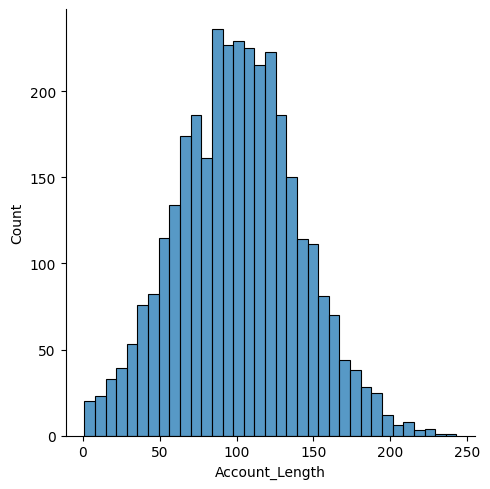

In [15]:
# Understand the account length distribution
sns.displot(telco['Account_Length'] )
plt.show()

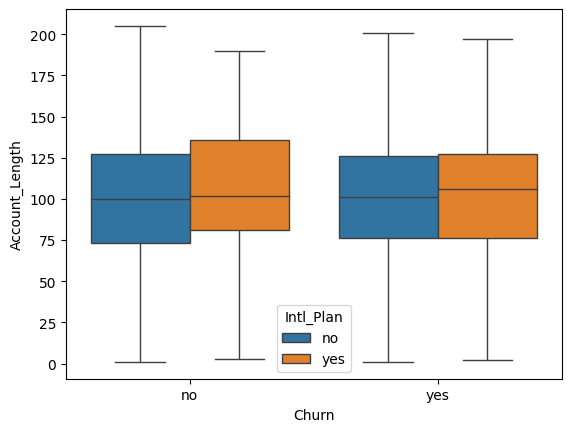

In [21]:
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco,
            showfliers=False,
            hue='Intl_Plan')
plt.show()


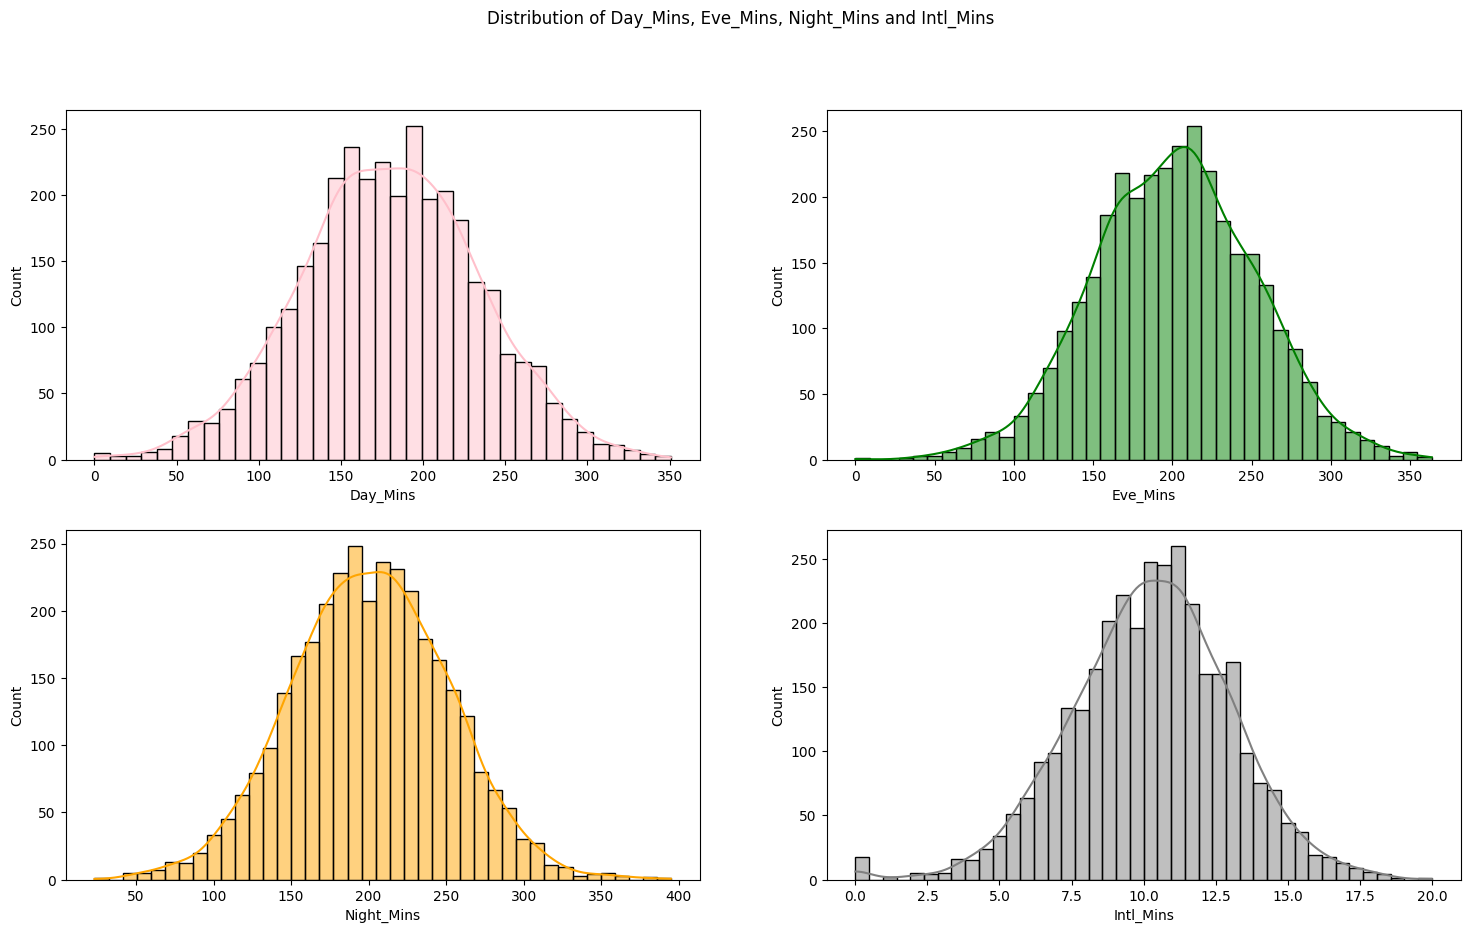

In [34]:
# Visualize the distribution of 'Day_Mins', 'Eve_Mins', 'Night_Mins' and 'Intl_Mins'
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Distribution of Day_Mins, Eve_Mins, Night_Mins and Intl_Mins')

sns.histplot(telco['Day_Mins'],ax=axes[0, 0], color = 'pink', kde=True)
sns.histplot(telco['Eve_Mins'],ax=axes[0, 1], color='green', kde=True)
sns.histplot(telco['Night_Mins'],ax=axes[1, 0], color='orange', kde=True)
sns.histplot(telco['Intl_Mins'],ax=axes[1, 1], color='gray', kde=True)

plt.show()

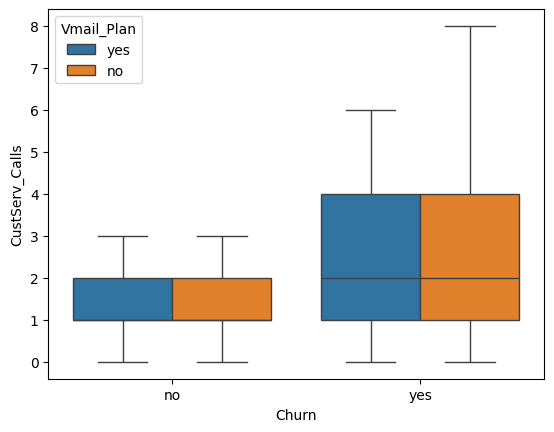

In [39]:
# Create a box plot with 'Churn' on the x-axis and 'CustServ_Calls' on the y-axis.
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            showfliers=False,
            hue = "Vmail_Plan")
plt.show()